In [1]:
import instant_ngp
import torch
import slam
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

model, matching = slam.get_models()
image_prefix = "indoor1"

xFormers not available
xFormers not available


Loaded SuperPoint model
Loaded SuperGlue model ("indoor" weights)


In [2]:
data = slam.training_preprocessor(
    image_prefix=image_prefix, 
    model=model,
    matching=matching,
    force_reload=False)

training_data = DataLoader(data, batch_size=2**14, shuffle=True)
ngp_model = instant_ngp.InstantNGP()

In [3]:
reload(instant_ngp)
instant_ngp.train(model=ngp_model, data_loader=training_data)

Epoch 1/1: 100%|██████████| 99/99 [06:57<00:00,  4.22s/batch, loss=0.107]

Epoch 1/1, Average Loss: 0.10717421303493808


In [4]:
data = slam.inference_preprocessor(position=np.array([0,0,0]), direction=np.array([0,0,1]))
inference_dataloader = DataLoader(data, 2**14, shuffle=False)

Rotation: 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Inference Progress: 100%|██████████| 17/17 [00:43<00:00,  2.54s/batch]

torch.Size([268324, 64, 3])
torch.Size([268324, 64])
torch.Size([268324, 64])


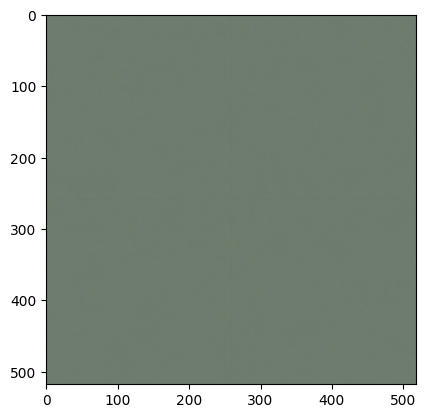

In [5]:
img = instant_ngp.infer(model=ngp_model, data_loader=inference_dataloader)
plt.imshow(img)